## <center>CSCI E-82</center>
## <center>HW 1  Dimensionality Reduction</center>
### <center>Due: Sept 17, 2018 11:59pm EST</center>

#### Note that this is an individual homework to be completed without collaborations except through Piazza.  

#### We encourage you to make progress this weekend since the second homework will likely come out in a week before this one is due.



### Your name:

PAUL M. WASHBURN

### Problem 1   (5 points)

$$\mathbf{X} = \left[\begin{array}
{rrr}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{array}\right]
$$

$$\mathbf{Y} = \left[\begin{array}
{rrr}
1 & 2 & 1 \\
2 & 1 & 2  
\end{array}\right]
$$

Compute XY<sup>T</sup>.  The answer can be computed by hand and written in Markdown like the above matrices, or computed in python.  Either way is acceptable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
X = np.arange(1, 10).reshape(3, 3)
Y = np.array([[1, 2, 1], [2, 1, 2]])
np.matmul(X, Y.T)

array([[ 8, 10],
       [20, 25],
       [32, 40]])

In [3]:
np.dot(X, Y.T)

array([[ 8, 10],
       [20, 25],
       [32, 40]])

### Problem 2  

This problem goes through a combination of python data manipulations as well as the full math projection using PCA.  We have divided the problem into multiple parts.



### Problem 2a  (5 points)

Download and load in the data set from the UCI archive https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/.  Print the dimensions and the first few rows to demonstrate a successful load.

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data'
colnames = ['sequence_name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'target']
df = pd.read_fwf(url, header=None)
df.rename(columns=dict(zip(np.arange(0, 10), colnames)), inplace=True)

print('rows = %i, columns = %i' %(df.shape[0], df.shape[1]))
df.head()

rows = 336, columns = 9


,sequence_name,mcg,gvh,lip,chg,aac,alm1,alm2,target
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


### Problem 2b  (10 points)
Compute and print the covariance matrix for all columns excluding the first and last.  Rather than use the built-in function, compute this using python code for practice.  The following equation will suffice for this.

Cov(X, Y) = Σ ( Xi - X ) ( Yi - Y ) / N 


In [5]:
def cov_xy(m, y):
    '''
    Submit vectors as 1D arrays
    '''
    X = np.concatenate((m[:,np.newaxis], y[:,np.newaxis]), axis=1)
    N = X.shape[0] - 1
    X -= X.mean(axis=0)
    C = (np.dot(X.T, X.conj()) / N).squeeze()
    return C

def cov_matrix(df, cols):
    '''
    Returns covariance matrix with column names
    '''
    # create empty dataframe with variance on the diagonals
    cov_df = pd.DataFrame(np.diag(df[cols].var()), columns=cols, index=cols)

    # populate cov_df empty dataframe with covariances
    for X in cols:
        for Y in cols:
            # we already have the variances, so ignore when X == Y
            if X != Y:
                # populate empty dataframe with symmetrical value
                _cov = cov_xy(df[X], df[Y])[0, 1]
                cov_df.loc[Y, X] =  _cov
            else:
                pass
    return cov_df

cols = ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2']
C = cov_matrix(df, cols)
C

,mcg,gvh,lip,chg,aac,alm1,alm2
mcg,0.037882,0.013115,0.002529,0.000373,0.005257,0.016670,0.006810
gvh,0.013115,0.021950,0.000574,0.000075,0.001266,0.005546,-0.003729
lip,0.002529,0.000574,0.007831,0.000753,0.000760,0.001829,-0.001067
chg,0.000373,0.000075,0.000753,0.000744,-0.000149,-0.000045,-0.000298
aac,0.005257,0.001266,0.000760,-0.000149,0.014976,0.007379,0.006475
alm1,0.016670,0.005546,0.001829,-0.000045,0.007379,0.046549,0.036566
alm2,0.006810,-0.003729,-0.001067,-0.000298,0.006475,0.036566,0.043853


In [6]:
# make sure above is correct
pd.DataFrame(np.cov(df[cols].T), columns=cols, index=cols)

,mcg,gvh,lip,chg,aac,alm1,alm2
mcg,0.037882,0.013115,0.002529,0.000373,0.005257,0.016670,0.006810
gvh,0.013115,0.021950,0.000574,0.000075,0.001266,0.005546,-0.003729
lip,0.002529,0.000574,0.007831,0.000753,0.000760,0.001829,-0.001067
chg,0.000373,0.000075,0.000753,0.000744,-0.000149,-0.000045,-0.000298
aac,0.005257,0.001266,0.000760,-0.000149,0.014976,0.007379,0.006475
alm1,0.016670,0.005546,0.001829,-0.000045,0.007379,0.046549,0.036566
alm2,0.006810,-0.003729,-0.001067,-0.000298,0.006475,0.036566,0.043853


In [7]:
# make sure above is correct
print(np.allclose(cov_matrix(df, cols), df[cols].cov()))
print(np.allclose(cov_matrix(df, cols), np.cov(df[cols].T)))

True
True


### Problem 2c  (10 points)

Compute the decomposition of the covariance matrix using singular value decomposition.  Using a python function is definitely the way to go here.

In [10]:
u, s, v = np.linalg.svd(C)
print('u = ', u, '\n')
print('s = ', s, '\n')
print('v = ', v, '\n')
np.dot(u, np.dot(np.diag(s), v))

u =  [[-3.41720629e-01 -7.29824958e-01  4.56914809e-01  3.52555665e-01
  -1.29441525e-01  2.62199804e-02 -8.56193962e-03]
 [-9.17492644e-02 -5.28794379e-01 -7.04480258e-01 -3.42514767e-01
  -1.39018617e-01  2.81111220e-01  2.89703065e-04]
 [-1.99698823e-02 -7.25012267e-02  9.24097367e-02 -1.46705018e-02
   8.54762221e-01  4.93627297e-01 -1.06318528e-01]
 [ 9.74209562e-04 -1.16809378e-02  8.81896510e-03  1.64849996e-02
   8.61437517e-02  6.21081678e-02  9.94100049e-01]
 [-1.47115119e-01 -4.80496808e-02  4.70463079e-01 -8.66343630e-01
  -4.86492931e-02 -3.90505852e-02  1.64278490e-02]
 [-6.89914858e-01  7.21275410e-02 -2.54072739e-01 -1.83906883e-02
   3.50569568e-01 -5.75266798e-01  9.64476070e-03]
 [-6.13827312e-01  4.18124394e-01  2.07514962e-02  8.37356323e-02
  -3.17196689e-01  5.83358230e-01 -5.01770938e-03]] 

s =  [0.08970253 0.04243901 0.01463252 0.01288363 0.00853362 0.00493527
 0.00065892] 

v =  [[-3.41720629e-01 -9.17492644e-02 -1.99698823e-02  9.74209562e-04
  -1.47115119e-

array([[ 3.78823845e-02,  1.31149254e-02,  2.52922530e-03,
         3.73045487e-04,  5.25671464e-03,  1.66701386e-02,
         6.81016525e-03],
       [ 1.31149254e-02,  2.19504478e-02,  5.74328358e-04,
         7.46268657e-05,  1.26597015e-03,  5.54567164e-03,
        -3.72925373e-03],
       [ 2.52922530e-03,  5.74328358e-04,  7.83141436e-03,
         7.53020611e-04,  7.60135039e-04,  1.82886994e-03,
        -1.06688699e-03],
       [ 3.73045487e-04,  7.46268657e-05,  7.53020611e-04,
         7.44047619e-04, -1.49298152e-04, -4.50426439e-05,
        -2.98107676e-04],
       [ 5.25671464e-03,  1.26597015e-03,  7.60135039e-04,
        -1.49298152e-04,  1.49758200e-02,  7.37909915e-03,
         6.47523188e-03],
       [ 1.66701386e-02,  5.54567164e-03,  1.82886994e-03,
        -4.50426439e-05,  7.37909915e-03,  4.65486247e-02,
         3.65657196e-02],
       [ 6.81016525e-03, -3.72925373e-03, -1.06688699e-03,
        -2.98107676e-04,  6.47523188e-03,  3.65657196e-02,
         4.3852763

### Problem 2d  (10 points)

Compute the projection of the raw data onto the appropriate two eigenvectors.  Consider which columns should be projected and the normalizations.

In [19]:
assert np.linalg.det(C) >= 0 

eigenvalues, eigenvectors = np.linalg.eigh(C)
print('Eigenvalues \n%s\n' %eigenvalues)
print('Eigenvectors \n%s\n' %eigenvectors)

# eigenvectors orthonormal
print('np.dot(eigenvectors[1], eigenvectors[0]) = \n', np.dot(eigenvectors[1], eigenvectors[0]), '\n')

for vec in eigenvectors:
    assert np.allclose(1, np.linalg.norm(vec))
#print(eigenvectors[:,1])

# sort eigenvalues in desc order
idx = np.argsort (-eigenvalues )
eigenvalues = eigenvalues [ idx ]
eigenvectors = eigenvectors [: , idx ]

print('eigenvalues = \n', eigenvalues, '\n')
print('idx = ', idx, '\n')
print('eigenvectors = ', eigenvectors, '\n')

print('eigenvectors[:,idx[0]] = ', eigenvectors[:,idx[0]])

Eigenvalues 
[0.00065892 0.00493527 0.00853362 0.01288363 0.01463252 0.04243901
 0.08970253]

Eigenvectors 
[[-8.56193962e-03  2.62199804e-02 -1.29441525e-01  3.52555665e-01
   4.56914809e-01 -7.29824958e-01 -3.41720629e-01]
 [ 2.89703065e-04  2.81111220e-01 -1.39018617e-01 -3.42514767e-01
  -7.04480258e-01 -5.28794379e-01 -9.17492644e-02]
 [-1.06318528e-01  4.93627297e-01  8.54762221e-01 -1.46705018e-02
   9.24097367e-02 -7.25012267e-02 -1.99698823e-02]
 [ 9.94100049e-01  6.21081678e-02  8.61437517e-02  1.64849996e-02
   8.81896510e-03 -1.16809378e-02  9.74209562e-04]
 [ 1.64278490e-02 -3.90505852e-02 -4.86492931e-02 -8.66343630e-01
   4.70463079e-01 -4.80496808e-02 -1.47115119e-01]
 [ 9.64476070e-03 -5.75266798e-01  3.50569568e-01 -1.83906883e-02
  -2.54072739e-01  7.21275410e-02 -6.89914858e-01]
 [-5.01770938e-03  5.83358230e-01 -3.17196689e-01  8.37356323e-02
   2.07514962e-02  4.18124394e-01 -6.13827312e-01]]

np.dot(eigenvectors[1], eigenvectors[0]) = 
 -6.175615574477433e-16 

e

### Problem 2e  (10 points)

Plot the projected points such that the 8 different classes can be visually identified.  Be sure to label the classes and axes.  Commont on the quality of the separation of the different classes using PCA.

In [21]:
df.head()

,sequence_name,mcg,gvh,lip,chg,aac,alm1,alm2,target
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


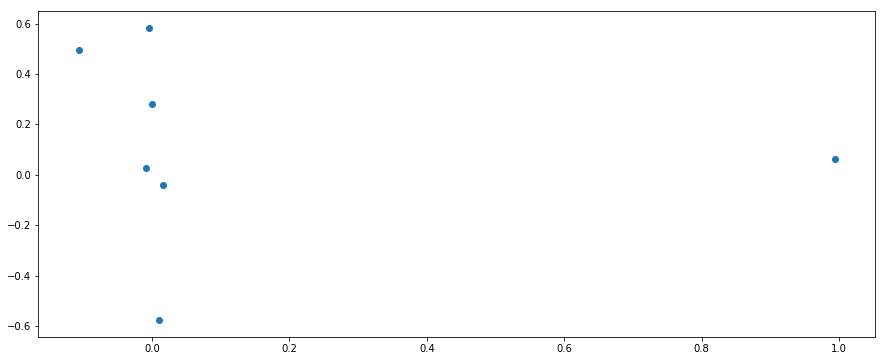

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_eig = pd.DataFrame(eigenvectors[:, idx])

fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(df_eig[0], df_eig[1])

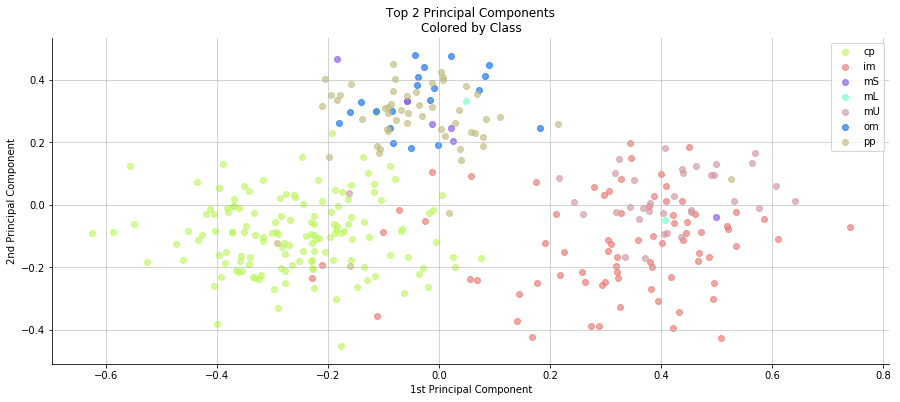

In [46]:
import random
from sklearn.decomposition import PCA

def random_hex(seed):
    np.random.seed(seed)
    r = lambda: random.randint(0, 255)
    return '#%02X%02X%02X' % (r(),r(),r())

# map targets to colors randomly
unq_tgts = df.target.unique()
colors = [random_hex(i) for i,cls in zip(range(len(unq_tgts)), unq_tgts)]

# perform PCA using sklearn
pca = PCA(n_components=2, random_state=77)
pca.fit(df[cols])
df_pca = pd.DataFrame(pca.transform(df[cols]))

# add target for plotting
df_pca['target'] = df['target']

# plot the first two PCs
fig, ax = plt.subplots(figsize=(15, 6))
i = 0
for target, _df in df_pca.groupby('target'):
    color = colors[i]
    label = unq_tgts[i]
    ax.scatter(_df[0], _df[1], color=color, label=label, alpha=.65)
    i += 1
ax.grid(alpha=.7)
sns.despine()
ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.legend(loc='best')
ax.set_title('Top 2 Principal Components\nColored by Class')
plt.show()

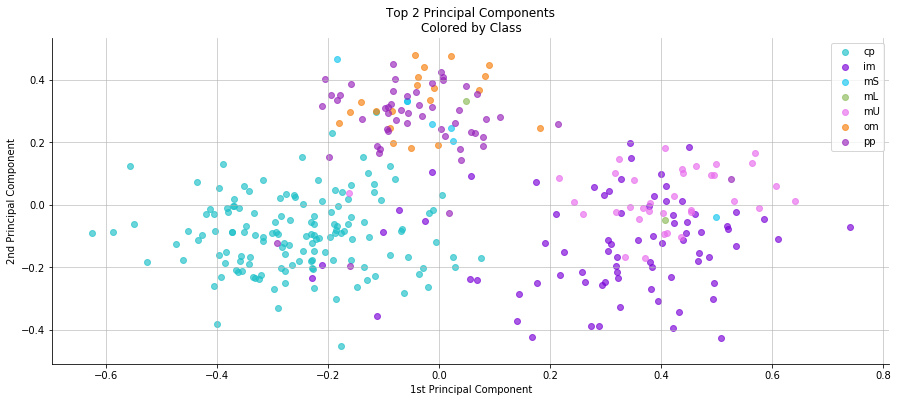

In [45]:
pca = PCA(n_components=2, random_state=77)
pca.fit(df[cols])
df_pca = pd.DataFrame(pca.transform(df[cols]))
df_pca['target'] = df['target']

fig, ax = plt.subplots(figsize=(15, 6))
i = 0
for target, _df in df_pca.groupby('target'):
    color = colors[i]
    label = unq_tgts[i]
    ax.scatter(_df[0], _df[1], color=color, label=label, alpha=.65)
    i += 1
ax.grid(alpha=.7)
sns.despine()
ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.legend(loc='best')
ax.set_title('Top 2 Principal Components\nColored by Class')
plt.show()

In [32]:
mu = df[cols].mean(axis=0)
print(mu)

df_0 = df[cols] - mu; print(df_0)
# ax = plt.gca()
# ax.axis([-3, 4, -3, 4])
# ax.scatter(df_0[0], df_0[1], s=200, c=set2_colors[1])
# ax.set_title('Raw and mean-subtracted, centered data')
# ax.grid(True)

mcg     0.500060
gvh     0.500000
lip     0.495476
chg     0.501488
aac     0.500030
alm1    0.500179
alm2    0.499732
dtype: float64
         mcg           gvh       lip       chg      aac      alm1      alm2
0   -0.01006 -2.100000e-01 -0.015476 -0.001488  0.05997 -0.260179 -0.149732
1   -0.43006 -1.000000e-01 -0.015476 -0.001488  0.03997 -0.150179 -0.059732
2    0.05994 -1.000000e-01 -0.015476 -0.001488 -0.01003 -0.130179 -0.039732
3    0.08994 -1.000000e-02 -0.015476 -0.001488  0.01997 -0.050179 -0.139732
4   -0.27006 -1.800000e-01 -0.015476 -0.001488  0.04997 -0.250179 -0.149732
5    0.16994 -1.100000e-01 -0.015476 -0.001488 -0.14003 -0.120179 -0.039732
6   -0.21006 -2.200000e-01 -0.015476 -0.001488 -0.06003 -0.270179 -0.159732
7   -0.29006 -1.600000e-01 -0.015476 -0.001488  0.00997 -0.220179 -0.109732
8   -0.30006 -6.000000e-02 -0.015476 -0.001488 -0.04003  0.009821  0.070268
9   -0.08006 -1.000000e-01 -0.015476 -0.001488  0.05997 -0.320179 -0.199732
10  -0.08006 -2.600000e-01 -0.

In [20]:
h1 = (eigenvectors[1][0]/eigenvectors[0][0])*df_0.x
h2 = (eigenvectors[1][1]/eigenvectors[0][1])*df_0.x

ax = plt.gca()
ax.plot(df_0.x, h1, color='blue', label='PC1')
ax.plot(df_0.x, h2, color='red', label='PC2')
ax.axis([-2, 2, -2, 2])
ax.scatter(df_0.x, df_0.y, s=200, c=set2_colors[1], label='Centered data')
ax.set_title('Principal components and centered data')
ax.grid(True)
cible_border()
legend = ax.legend(loc=4,frameon=True,framealpha=0.6, scatterpoints=1)
rect = legend.get_frame()
rect.set_facecolor(light_grey)
rect.set_linewidth(0.6)
plt.show()

NameError: name 'df_0' is not defined

### Problem 2f (10 points)

The PCA that you have just completed takes each data point and projects it using a weighted sum of features.  One could also do the opposite to map the features as a weighted sum of the data entries.  How could this be done?  What is a potential issue? Describe these in a few sentences (do not code it).

### Problem 3  MDS  (10 points)

For the same data set, repeat 2e using sklearn's Multidimensional scaling algorithm.  

### Problem 4a  t-SNE  (5 points)

Repeat 2e using a t-SNE plot with the default settings.

### Problem 4b t-SNE perplexity  (5 points)

Try out a few t-SNE plots by varying the perplexity.  State the best perplexity for separating the 8 different classes and describe your rationale in a sentence or two.  Report the average calculation time for the t-SNE projection over a number of iterations.

### Problem 4c  t-SNE randomization (10 points)

The S of t-SNE means stochastic or random, usually as a function of time.  Explore whether you can reproduce the result in 4b through a second projection and plot.

### Problem 4d t-SNE Barnes-Hut  (5 points)

The default t-SNE method of 4b uses the Barnes-Hut approximation.  Keeping the other parameters the same as 4b, plot the t-SNE result using the exact method.  Which method do you prefer?  Compare the average calculation time for the exact method over a number of iterations.

### How many hours did this homework take?  

This will not affect your grade.  We will be monitoring time spent on homework to be sure that we are not over-burdening students.

### Last step (5 points)

Save this notebook as LastnameFirstnameHW1.ipynb such as MuskElonHW1.ipynb.   Create a pdf of this notebook named similarly.  Submit both the python notebook and the pdf version to the Canvas dropbox.  We require both versions.